# **Car Evaluation Dataset**

Source of dataset: https://archive.ics.uci.edu/dataset/19/car+evaluation

# 1. Setup:

In [1]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

# 2. Load the modified Car Evaluation dataset:

In [2]:
# Load the dataset
car_data = pd.read_csv('Datasets/car_data.csv')

# Assign proper column names
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Initialize the LabelEncoder and encode the categorical columns
label_encoder = LabelEncoder()
for column in car_data.columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

# Display the first few rows of the encoded dataset
car_data.head()

# Prepare features (X) and target (y)
X_car = car_data.drop('class', axis=1)  # Features
y_car = car_data['class']  # Target

In [3]:
# Define classifiers
classifiers = {
    'Linear SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Define the partitions for training and testing
partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]

# Store results for each classifier, partition, and metric
results = {classifier_name: [] for classifier_name in classifiers}

# Perform training, validation, and testing
for classifier_name, classifier in classifiers.items():
    for train_size, test_size in partitions:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, train_size=train_size, test_size=test_size, random_state=42)
        
        # Train the classifier
        classifier.fit(X_train, y_train)
        
        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
        test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
        
        # Cross-validation for validation accuracy
        validation_accuracy = np.mean(cross_val_score(classifier, X_train, y_train, cv=5))
        
        # Store hyperparameters (if any)
        if hasattr(classifier, 'get_params'):
            hyperparameters = classifier.get_params()
        else:
            hyperparameters = "Default"
        
        # Store the results
        results[classifier_name].append({
            'Train Size': f"{train_size*100}/{test_size*100}",
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Validation Accuracy': validation_accuracy,
            'Hyperparameters': hyperparameters
        })



# 3. Display Classifer Results:

In [4]:
# Display results for each classifier
for classifier_name, classifier_results in results.items():
    print(f"\n{classifier_name} Results:")
    for result in classifier_results:
        print(f"Split: {result['Train Size']}")
        print(f"  Training Accuracy: {result['Training Accuracy']:.4f}")
        print(f"  Testing Accuracy: {result['Testing Accuracy']:.4f}")
        print(f"  Validation Accuracy: {result['Validation Accuracy']:.4f}")
        print(f"  Hyperparameters: {result['Hyperparameters']}\n")



Linear SVM Results:
Split: 20.0/80.0
  Training Accuracy: 0.6928
  Testing Accuracy: 0.7214
  Validation Accuracy: 0.6899
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Split: 50.0/50.0
  Training Accuracy: 0.7103
  Testing Accuracy: 0.7315
  Validation Accuracy: 0.7115
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Split: 80.0/20.0
  Training Accuracy: 0.7205
  Testing Accuracy: 0.7168
  Validation Accuracy: 0.7241
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 20

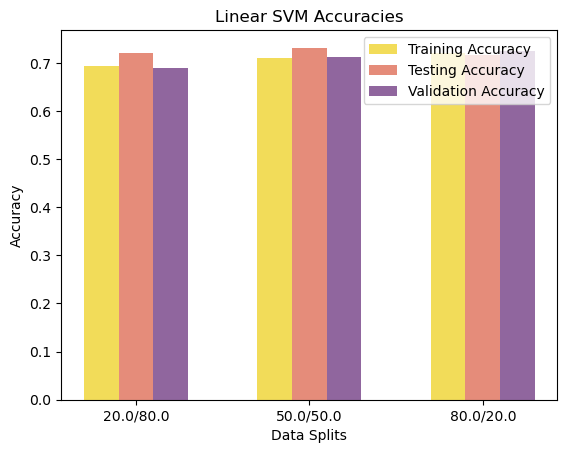

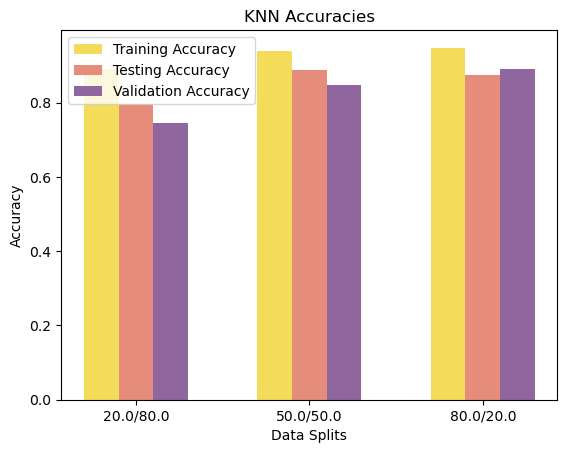

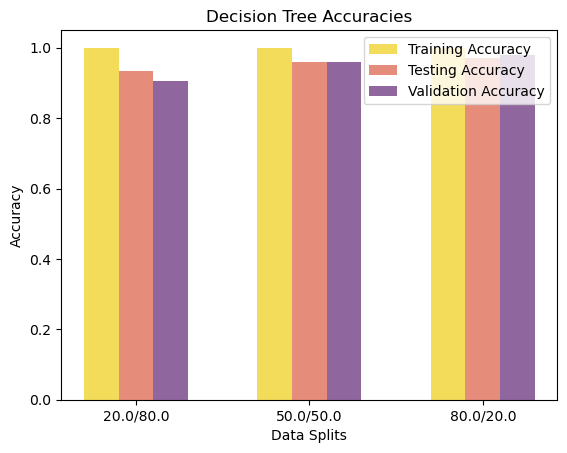

In [24]:
# Visualize accuracy results with bar charts
for classifier_name, classifier_results in results.items():
    train_accuracies = [result['Training Accuracy'] for result in classifier_results]
    test_accuracies = [result['Testing Accuracy'] for result in classifier_results]
    validation_accuracies = [result['Validation Accuracy'] for result in classifier_results]
    
    splits = [result['Train Size'] for result in classifier_results]
    
    # Create a bar chart for each classifier
    bar_width = 0.2
    index = np.arange(len(splits))

    plt.bar(index, train_accuracies, bar_width, label='Training Accuracy', color='#f2dc59')
    plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy', color='#e58c7a')
    plt.bar(index + 2*bar_width, validation_accuracies, bar_width, label='Validation Accuracy', color='#90669e')

    plt.xlabel('Data Splits')
    plt.ylabel('Accuracy')
    plt.title(f'{classifier_name} Accuracies')
    plt.xticks(index + bar_width, splits)
    plt.legend()
    plt.show()
